***
# from ztfquery import query
***

### ztfquery.query enables you to get any ZTF IPAC product. 

ztfquery.query basically is a python wrapper of the ztf web API (https://irsa.ipac.caltech.edu/docs/program_interface/ztf_api.html)

**Note**: you will need an IRSA account (https://irsa.ipac.caltech.edu/frontpage/)

### Data you have access to:

* `kind='sci'`: Science Image data and derived products:

    - sciimg.fits (primary science image) # (default)
    - mskimg.fits (bit-mask image)
    - psfcat.fits (PSF-fit photometry catalog)
    - sexcat.fits (nested-aperture photometry catalog)
    - sciimgdao.psf (spatially varying PSF estimate in DAOPhot's lookup table format)
    - sciimgdaopsfcent.fits (PSF estimate at science image center as a FITS image)
    - sciimlog.txt (log output from instrumental calibration pipeline)
    - scimrefdiffimg.fits.fz (difference image: science minus reference; fpack-compressed)
    - diffimgpsf.fits (PSF estimate for difference image as a FITS image)
    - diffimlog.txt (log output from image subtraction and extraction pipeline)
    - log.txt (overall system summary log from realtime pipeline)
    
    
* `kind='raw'`: Images as they are acquired

    - no choice, these are the raw images
    
    
* `kind='ref'`:  Reference images and assocated products

    - log.txt
    - refcov.fits
    - refimg.fits # (default)
    - refimlog.txt
    - refpsfcat.fits
    - refsexcat.fits
    - refunc.fits
    
    
* `kind='cal'`: Calibration images and products

    `caltype` are Bias (`bias`) or High Frequency Flat (`hifreqflat`) 
    - None (#default) returns `caltype`.fits
    - log:            returns `caltype`log.txt
    - unc:            returns `caltype`unc.fits
    
    
### How the IRSA ZTF service works

The data access is made in 2 steps: 

1. Find the 'metadata' information associated to a query you make. These 'metadata' enables to build the actual datapath

2. Build the datapath for downloading or getting the files locally if they are already downloaded. 

Remark: the basename of any IPAC file enables to reconstruct its full path. This is useful. 

***
# Step 0 Instanciate a "zquery"

In [1]:
from ztfquery import query
zquery = query.ZTFQuery()

***
# Step 1 Download the metadata 

Say you want the `science` data associated to a target at location `RA=276.107960`, `Dec=+44.130398` observed between 
the `2nd and the 10th of May 2019`.


**Note**: Check `get_data()` at the end of this tutorial.

In [34]:
# IRSA expects julian dates, so let's get them
from astropy import time
tstart = time.Time("2019-05-02").jd
tend = time.Time("2019-05-10").jd

In [35]:
zquery.load_metadata(kind="sci", radec=[276.107960,+44.130398], size=0.01, 
                    sql_query=f"obsjd BETWEEN {tstart} AND {tend}")

The `sql_query` option will accept SQL WHERE clause with some restrictions. 
    [https://en.wikipedia.org/wiki/Where_(SQL)]
Function calls and sub-queries are not supported. 
You can use AND, OR, NOT, IN, BETWEEN, LIKE, IS, the usual arithmetic and comparison operators, and literal values.


Any of the entry listed [here](https://irsa.ipac.caltech.edu/TAP/sync?query=select+column_name,description,unit,ucd,utype,datatype,principal,indexed+from+TAP_SCHEMA.columns+where+table_name=%27ztf.ztf_current_meta_sci%27+order+by+column_index&format=html) could be queried.


### MetaTable

The metadata you downloaded are stored as `metatable`. This is a pandas.DataFrame

In [5]:
zquery.metatable

,in_row_id,in_ra,in_dec,ra,dec,infobits,field,ccdid,qid,rcid,...,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,ipac_pub_date,ipac_gid
0,1,276.10796,44.130398,276.566892,43.815389,0,726,15,2,57,...,277.156888,44.256429,275.951058,44.237350,275.985692,43.371489,277.174487,43.390009,2020-12-09 00:00:00+00,2
1,1,276.10796,44.130398,276.440154,44.368781,0,764,1,3,2,...,277.076585,44.779406,275.860378,44.820220,275.813050,43.954770,277.011086,43.914478,2020-12-09 00:00:00+00,2
2,1,276.10796,44.130398,276.440713,44.370624,0,764,1,3,2,...,277.077361,44.781123,275.861038,44.822155,275.813398,43.956737,277.011553,43.916224,2020-12-09 00:00:00+00,2
3,1,276.10796,44.130398,276.434434,44.361912,0,764,1,3,2,...,277.071179,44.772301,275.854721,44.813580,275.806959,43.948111,277.005281,43.907381,2020-12-09 00:00:00+00,2
4,1,276.10796,44.130398,276.435142,44.365961,0,764,1,3,2,...,277.071858,44.776396,275.855487,44.817554,275.807769,43.952143,277.005940,43.911502,2020-12-09 00:00:00+00,2
5,1,276.10796,44.130398,276.438229,44.371593,0,764,1,3,2,...,277.074745,44.782216,275.858452,44.823087,275.811033,43.957588,277.009174,43.917228,2020-12-09 00:00:00+00,2
6,1,276.10796,44.130398,276.438944,44.373041,0,764,1,3,2,...,277.075375,44.783757,275.859011,44.824458,275.811812,43.958925,277.010029,43.918741,2020-12-09 00:00:00+00,2
7,1,276.10796,44.130398,276.434849,44.372613,0,764,1,3,2,...,277.071367,44.783268,275.854996,44.824099,275.807652,43.958569,277.005831,43.918277,2020-12-09 00:00:00+00,2
8,1,276.10796,44.130398,276.438462,44.371164,0,764,1,3,2,...,277.075041,44.781715,275.858742,44.822665,275.811215,43.957224,277.009340,43.916801,2020-12-09 00:00:00+00,2
9,1,276.10796,44.130398,276.437484,44.369634,33554432,764,1,3,2,...,277.073953,44.780291,275.857675,44.821095,275.810330,43.955589,277.008453,43.915303,2020-12-09 00:00:00+00,2


You can vizualise the sky footprint of the query by doing:

<IPython.core.display.Javascript object>


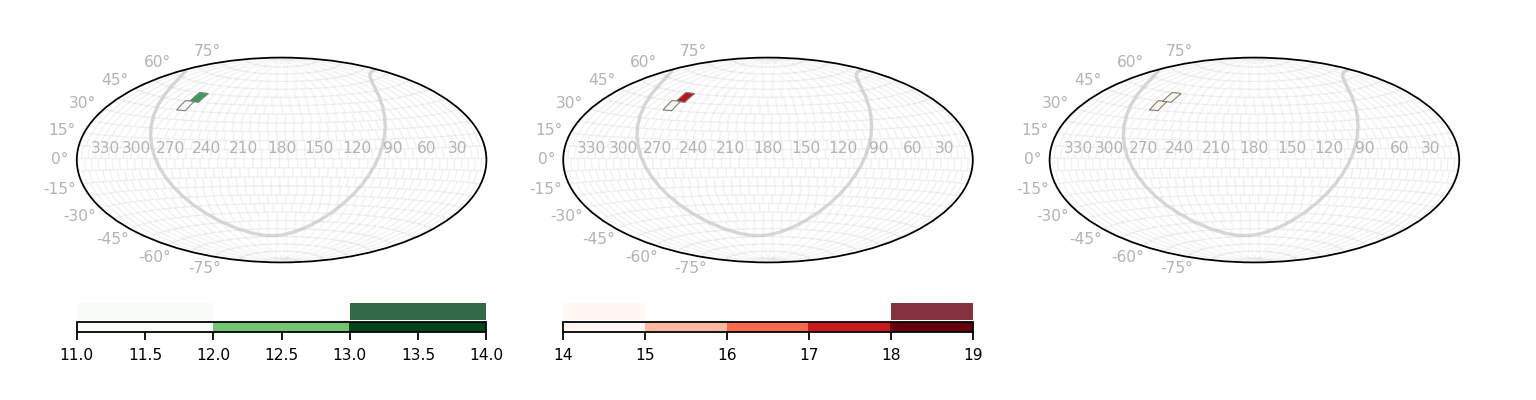

/Users/mrigault/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/mrigault/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/mrigault/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

In [4]:
%matplotlib notebook
zquery.show_gri_fields()

## Storing the metatable

Large metaquery could be slow (sometime even crashes, depending on IPAC and your connection). Fortunately, you can simply `store` the metatable and reload it when you latter need it.

### store

In [8]:
zquery.metatable.to_csv("data/metatable_example1.csv")

### reload

In [15]:
# this guesses the `kind`
zquery_reloaded = query.ZTFQuery.from_metafile("data/metatable_example1.csv") 

alternative reload

In [16]:
import pandas
metatable = pandas.read_csv("data/metatable_example1.csv", index_col=0)
# the either
zquery_reloaded  = query.ZTFQuery(metatable=metatable, kind="sci")
# or 
zquery_reloaded  = query.ZTFQuery()
zquery_reloaded.set_metatable(metatable, kind='sci')

***
# Step 2: Download the data

The is very simple: simply use `download_data()` !


`download_data()` has many option, notably
- `suffix`: enables you to select which data to download. (see list at the top)
- `indexes`: list of `metatable.index` to download. (default = all)
- `nprocess`: number of parallel download processing (say e.g. 4 for a laptop, default = 1)
- `show_progress`: show a download progress bar (default = True)
- `nodl`: do not launch the download simply print what will be downloaded where. 
- `download_dir`: force the download to a specific directory. Carefule, `ztfquery` won't be able to find them later on.

Say I want the `psfcat.fits` (remember we downloaded the metadata associated to `kind='sci'`)

In [18]:
zquery.download_data("psfcat.fits", nprocess=4, show_progress=True)

FloatProgress(value=0.0)

/Users/mrigault/opt/anaconda3/lib/python3.8/site-packages/ztfquery-1.13.0-py3.8.egg/ztfquery/io.py:543: UserWarning: parallel downloading ; asking for 4 processes
  warnings.warn("parallel downloading ; asking for %d processes"%nprocess)


FloatProgress(value=0.0)

***
# Step 3: retreive the data

ztfquery follows the IPAC data structure. It is then very simple to find back the data you downloaded. 

All is based on `get_data_path()`. This method converts the `metatable` information into a path. The root of this path could be `irsa`, then it is the URL to download the data or `local`, then it is the full path.

`get_local_data()` calls `get_data_path(source="local")`, checks if the files exist and returns only the existing ones.

you can again provide:
- `indexes`: list of `metatable.index` to get. (default = all)


**Note**: Check `get_data()` at the end of this tutorial.

In [20]:
zquery.get_local_data("psfcat.fits")

['/Users/mrigault/Data/ZTF/sci/2019/0503/328380/ztf_20190503328380_000726_zr_c15_o_q2_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0502/457859/ztf_20190502457859_000764_zr_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0504/367350/ztf_20190504367350_000764_zr_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0503/292442/ztf_20190503292442_000764_zr_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0503/327014/ztf_20190503327014_000764_zr_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0504/431782/ztf_20190504431782_000764_zg_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0503/485185/ztf_20190503485185_000764_zg_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0503/442292/ztf_20190503442292_000764_zg_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0504/390787/ztf_20190504390787_000764_zr_c01_o_q3_psfcat.fits',
 '/Users/mrigault/Data/ZTF/sci/2019/0505/430602/ztf_20190505430602_000764_zg_c01_o_q3_psfcat.fits',


***
***
# Advanced Tools: ztfquery.io.get_file() / zquery.get_data()

They are useful methods inside `zquery` made to simplify your life. 
The aforementioned metatable store/reload can save you a lot of time and simplify share of code between users. 


As mentioned above, the basename of a irsa object enables to rebuild its full path. 
`ztfquery.buildurl.filename_to_{kind}url()`, with  `kind`=`"science"` (not sci) or `"cal"` or `"raw"` or `"ref"`.
does that for you. For instance:


In [21]:
from ztfquery import buildurl

In [23]:
# To get the url
buildurl.filename_to_scienceurl("ztf_20190509446088_000726_zr_c15_o_q2_psfcat.fits")

'https://irsa.ipac.caltech.edu/ibe/data/ztf/products/sci/2019/0509/446088/ztf_20190509446088_000726_zr_c15_o_q2_psfcat.fits'

In [24]:
# To get the local path
buildurl.filename_to_scienceurl("ztf_20190509446088_000726_zr_c15_o_q2_psfcat.fits", source="local")

'/Users/mrigault/Data/ZTF/sci/2019/0509/446088/ztf_20190509446088_000726_zr_c15_o_q2_psfcat.fits'

You can also provide another suffix (i.e., data to download). For instance, say I want to corresponding science image (`sciimg.fits`)

In [25]:
buildurl.filename_to_scienceurl("ztf_20190509446088_000726_zr_c15_o_q2_psfcat.fits", source="local", 
                                suffix="sciimg.fits")

'/Users/mrigault/Data/ZTF/sci/2019/0509/446088/ztf_20190509446088_000726_zr_c15_o_q2_sciimg.fits'

**Remark** that this builds the path, it does not mean the file exist.

## ztfquery.io.get_file(): Getting your data

`ztfquery.io.get_file()` is a very high level function of ztfquery that basically does everything you need. 

If you provide a basename, it will create the full path, checks if the file exists and if not it will download it for you. You can change the suffix.
You can even provide multiple suffixes and multiple basenames (or full path).


Say someone tell me to look at the file `ztf_20190917468333_000698_zi_c03_o_q2_sciimg`.
Then I can do:

In [28]:
from ztfquery.io import get_file

In [30]:
get_file("ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits")

FloatProgress(value=0.0)

'/Users/mrigault/Data/ZTF/sci/2019/0917/468333/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits'

If you already have it, it will simply returns the local fullpath, if not, it will first download the file and then gets you the full path.

try again:

In [31]:
get_file("ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits")

'/Users/mrigault/Data/ZTF/sci/2019/0917/468333/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits'

Say now you want the `sciimg.fits` and the `mskimg.fits` associated to a couple of `psfcat.fits` you downloaded before.


`get_file()` has some useful options:
- `suffix`: provide a alternative file suffix (or list of)
- `downloadit`: if the file does not exist, should this download it ?
- `maxnprocess`: maximum number of download processes. This goes to download_data(nprocess) but reduced to the number of files to download if lower than nprocess
- `fill_notexist`: Place holder for the return list of file is the file does not exist at the end.

In [32]:
files_ = ["ztf_20190509436007_000764_zr_c01_o_q3_psfcat.fits","ztf_20190503472280_000726_zg_c15_o_q2_psfcat.fits",
         "ztf_20190502456921_000726_zr_c15_o_q2_psfcat.fits"]

In [33]:
get_file(files_, suffix=["sciimg.fits", "mskimg.fits"], maxnprocess=4)

FloatProgress(value=0.0)

array(['/Users/mrigault/Data/ZTF/sci/2019/0509/436007/ztf_20190509436007_000764_zr_c01_o_q3_sciimg.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0509/436007/ztf_20190509436007_000764_zr_c01_o_q3_mskimg.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0503/472280/ztf_20190503472280_000726_zg_c15_o_q2_sciimg.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0503/472280/ztf_20190503472280_000726_zg_c15_o_q2_mskimg.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0502/456921/ztf_20190502456921_000726_zr_c15_o_q2_sciimg.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0502/456921/ztf_20190502456921_000726_zr_c15_o_q2_mskimg.fits'],
      dtype='<U95')

## zquery.get_data(): get_file() associated to zquery

you can use the get_file() functionality from a zquery using `zquery.get_data()`. 

The basic use of this is that you don't need to care if you already downloaded a file or not. Simply use `get_data()` instead of `download_data()` then `get_local_data()` and `zquery` will know what to do.

In [38]:
zquery.get_data("psfcat.fits", show_progress=False)

array(['/Users/mrigault/Data/ZTF/sci/2019/0503/328380/ztf_20190503328380_000726_zr_c15_o_q2_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0502/457859/ztf_20190502457859_000764_zr_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0504/367350/ztf_20190504367350_000764_zr_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0503/292442/ztf_20190503292442_000764_zr_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0503/327014/ztf_20190503327014_000764_zr_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0504/431782/ztf_20190504431782_000764_zg_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0503/485185/ztf_20190503485185_000764_zg_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0503/442292/ztf_20190503442292_000764_zg_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0504/390787/ztf_20190504390787_000764_zr_c01_o_q3_psfcat.fits',
       '/Users/mrigault/Data/ZTF/sci/2019/0505

**Remark** that, if you know you have the files or do not care to download the missing ones, `get_local_data()` is splightly faster.

***
# Credits:

Tutorial made by M. Rigault (m.rigault@ipnl.in2p3.fr)

If you have used ztfquery in any point of you research work, please cite https://ui.adsabs.harvard.edu/abs/2018zndo...1345222R/abstract. 

**Citations are important as they enable to justify the time spent to build code like this one to funding agencies.**


### Acknowledgements:

*The ztfquery code was funded by the European Research Council (ERC) under the European Union's Horizon 2020 research and innovation programme (grant agreement n°759194 - USNAC, PI: Rigault).*
***